<a href="https://colab.research.google.com/github/Yul-Art/SF-DST/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_9_5_%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_ML_6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML-6._Задание 9.5._Отбор_признаков**

Обучите модель линейной регрессии на найденных двумя способами трёх важных признаках и сравните полученные результаты.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns #для визуализации
import matplotlib.pyplot as plt #для визуализации

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn import preprocessing # для масштабирования
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data_ford_price.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [5]:
data.describe()

,price,year,condition,cylinders,odometer,lat,long,weather
count,7017.000000,7017.000000,7017.000000,7017.000000,7.017000e+03,7017.000000,7017.000000,6837.000000
mean,15121.549523,2007.869745,2.598689,7.374662,1.199787e+05,39.550144,-91.903404,52.142899
std,11765.423119,6.975329,0.703662,0.942928,8.992216e+04,5.745409,14.030710,7.954830
min,1.000000,1957.000000,0.000000,3.000000,0.000000e+00,-2.508807,-151.055832,29.000000
25%,5995.000000,2004.000000,2.000000,6.000000,7.328500e+04,35.661076,-95.937145,45.000000
50%,12750.000000,2010.000000,3.000000,8.000000,1.180000e+05,40.335245,-88.168416,51.000000
75%,21995.000000,2013.000000,3.000000,8.000000,1.578040e+05,43.582100,-82.706300,59.000000
max,299500.000000,2018.000000,5.000000,10.000000,2.490000e+06,77.617682,-5.377999,71.000000


# Предобработка данных

In [6]:
# удалим пропуски для удобства
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5202 non-null   int64  
 1   year          5202 non-null   int64  
 2   condition     5202 non-null   int64  
 3   cylinders     5202 non-null   int64  
 4   odometer      5202 non-null   int64  
 5   title_status  5202 non-null   object 
 6   transmission  5202 non-null   object 
 7   drive         5202 non-null   object 
 8   size          5202 non-null   object 
 9   lat           5202 non-null   float64
 10  long          5202 non-null   float64
 11  weather       5202 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 528.3+ KB


In [8]:
# посмотрим, есть ли дубликаты
data.duplicated().sum()

1795

In [9]:
# удалим дубликаты
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         3407 non-null   int64  
 1   year          3407 non-null   int64  
 2   condition     3407 non-null   int64  
 3   cylinders     3407 non-null   int64  
 4   odometer      3407 non-null   int64  
 5   title_status  3407 non-null   object 
 6   transmission  3407 non-null   object 
 7   drive         3407 non-null   object 
 8   size          3407 non-null   object 
 9   lat           3407 non-null   float64
 10  long          3407 non-null   float64
 11  weather       3407 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 346.0+ KB


<ipython-input-10-653a69c4c65b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


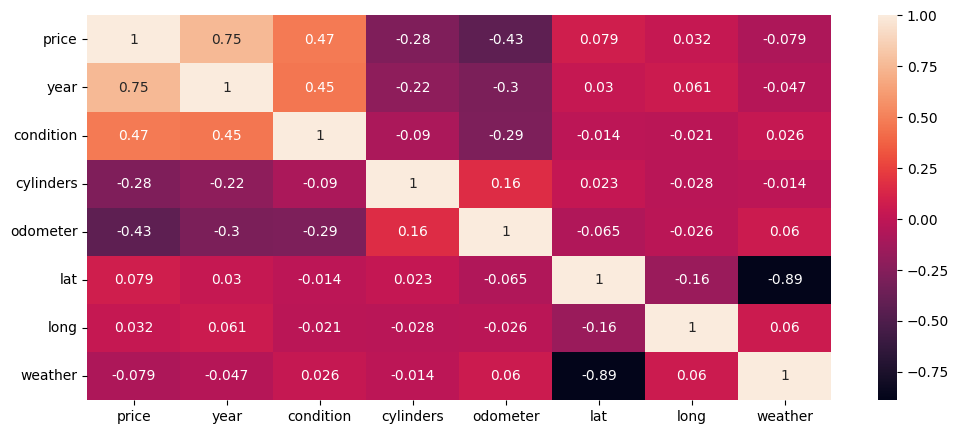

In [10]:
# Строим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между факторами и целевым признаком
fig = plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True);

Мы выяснили, что у нас присутствует сильная зависимость между lat и weather. Удалим lat, так как этот признак, в отличие от weather, необходимо округлять.

In [11]:
data.drop('lat', axis = 1, inplace = True)

# Кодирование признаков

In [12]:
# количество уникальных значений
data.nunique()

price           1068
year              42
condition          6
cylinders          6
odometer        2042
title_status       5
transmission       3
drive              3
size               4
long            2108
weather           25
dtype: int64

In [13]:
# выберем столбцы для однократного кодирования
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
data = pd.get_dummies(data, columns=columns_to_change)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 7016
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   3407 non-null   int64  
 1   year                    3407 non-null   int64  
 2   condition               3407 non-null   int64  
 3   odometer                3407 non-null   int64  
 4   long                    3407 non-null   float64
 5   weather                 3407 non-null   float64
 6   cylinders_3             3407 non-null   uint8  
 7   cylinders_4             3407 non-null   uint8  
 8   cylinders_5             3407 non-null   uint8  
 9   cylinders_6             3407 non-null   uint8  
 10  cylinders_8             3407 non-null   uint8  
 11  cylinders_10            3407 non-null   uint8  
 12  title_status_clean      3407 non-null   uint8  
 13  title_status_lien       3407 non-null   uint8  
 14  title_status_missing    3407 non-null   

# Масштабирование

In [15]:
data.describe()

,price,year,condition,odometer,long,weather,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
count,3407.000000,3407.000000,3407.000000,3.407000e+03,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,...,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000
mean,14263.289698,2007.270326,2.533314,1.215685e+05,-90.966330,52.676548,0.000294,0.002348,0.000294,0.307015,...,0.945113,0.049310,0.005577,0.701497,0.017317,0.281186,0.003816,0.879072,0.116818,0.000294
std,10991.667483,7.271354,0.727363,9.699488e+04,13.520417,7.910048,0.017132,0.048407,0.017132,0.461323,...,0.227793,0.216547,0.074480,0.457669,0.130470,0.449644,0.061662,0.326091,0.321251,0.017132
min,1.000000,1965.000000,0.000000,0.000000e+00,-151.055832,29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,2004.000000,2.000000,7.381700e+04,-95.664519,45.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,11500.000000,2008.000000,3.000000,1.160000e+05,-88.066450,52.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,21490.000000,2013.000000,3.000000,1.600000e+05,-82.183850,59.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74374.000000,2018.000000,5.000000,2.490000e+06,-68.412100,71.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
data_scaled = data.copy()
# создадим список имен столбцов
col_names = ['year', 'condition', 'odometer', 'long', 'weather']
 # произведем нормализацию столбцов
data_scaled[col_names] = r_scaler.fit_transform(data_scaled[col_names].values)

data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 7016
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   3407 non-null   int64  
 1   year                    3407 non-null   float64
 2   condition               3407 non-null   float64
 3   odometer                3407 non-null   float64
 4   long                    3407 non-null   float64
 5   weather                 3407 non-null   float64
 6   cylinders_3             3407 non-null   uint8  
 7   cylinders_4             3407 non-null   uint8  
 8   cylinders_5             3407 non-null   uint8  
 9   cylinders_6             3407 non-null   uint8  
 10  cylinders_8             3407 non-null   uint8  
 11  cylinders_10            3407 non-null   uint8  
 12  title_status_clean      3407 non-null   uint8  
 13  title_status_lien       3407 non-null   uint8  
 14  title_status_missing    3407 non-null   

In [17]:
data_scaled.describe()

,price,year,condition,odometer,long,weather,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,size_compact,size_full-size,size_mid-size,size_sub-compact
count,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,...,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000
mean,14263.289698,-0.081075,-0.466686,0.064612,-0.215114,0.048325,0.000294,0.002348,0.000294,0.307015,...,0.945113,0.049310,0.005577,0.701497,0.017317,0.281186,0.003816,0.879072,0.116818,0.000294
std,10991.667483,0.807928,0.727363,1.125453,1.002949,0.565003,0.017132,0.048407,0.017132,0.461323,...,0.227793,0.216547,0.074480,0.457669,0.130470,0.449644,0.061662,0.326091,0.321251,0.017132
min,1.000000,-4.777778,-3.000000,-1.345973,-4.672571,-1.642857,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,-0.444444,-1.000000,-0.489458,-0.563627,-0.500000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,11500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,21490.000000,0.555556,0.000000,0.510542,0.436373,0.500000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74374.000000,1.111111,2.000000,27.546036,1.457965,1.357143,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Обучение модели

In [18]:
# выделим целевой признак
y = data_scaled['price']
x = data_scaled.drop(columns='price')

In [19]:
# Разделим выборку на тренировочную и тестовую в соотношении 80/20:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# обучим модель
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

# рассчитываем коэффициент детерминации
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.663
Test R^2: 0.692


# Очистка от выбросов

In [21]:
# очистим от выбросов
from  sklearn.ensemble import IsolationForest

# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_predicted = iso.fit_predict(X_train)

# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

# обучим модель
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

#Рассчитываем коэффициент детерминации
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(2452, 26) (2452,)
Train R^2: 0.680
Test R^2: 0.693


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

Метод рекурсивного исключения признаков (RFE) предполагает выбор признаков путём рекурсивного рассмотрения всё меньших и меньших наборов фичей.

Сначала RFE обучается на изначальной выборке и происходит оценка важности каждого признака. Затем наименее важные фичи удаляются. Эта процедура рекурсивно повторяется на сокращённом наборе до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков в выборке.

In [22]:
# Выделим три наиболее значимых признака и обучим на них модель:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

selector.get_feature_names_out()

array(['year', 'size_mid-size', 'size_sub-compact'], dtype=object)

In [23]:
x_RFE=x[['year', 'size_mid-size', 'size_sub-compact']]
x_RFE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 7016
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              3407 non-null   float64
 1   size_mid-size     3407 non-null   uint8  
 2   size_sub-compact  3407 non-null   uint8  
dtypes: float64(1), uint8(2)
memory usage: 59.9 KB


In [24]:
x_train_RFE, x_test_RFE, y_train_RFE, y_test_RFE = train_test_split(x_RFE, y, test_size=0.2, random_state=42) #выделяем тренировочню и тестовую выборку

# обучаем модель
RFE_model = LinearRegression()
RFE_model.fit(x_train_RFE, y_train_RFE)
y_train_predict_RFE = RFE_model.predict(x_train_RFE)
y_test_predict_RFE = RFE_model.predict(x_test_RFE)

# рассчитываем коэффициент детерминации
print("Train R^2: {:.3f}".format(r2_score(y_train_RFE, y_train_predict_RFE)))
print("Test R^2: {:.3f}".format(r2_score(y_test_RFE, y_test_predict_RFE)))

Train R^2: 0.569
Test R^2: 0.599


##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [25]:
# выбор k лучших переменных: SelectKBest
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)

selector.get_feature_names_out()

array(['year', 'condition', 'odometer'], dtype=object)

In [26]:
x_Best=x[['year', 'condition', 'odometer']]
x_Best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3407 entries, 0 to 7016
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       3407 non-null   float64
 1   condition  3407 non-null   float64
 2   odometer   3407 non-null   float64
dtypes: float64(3)
memory usage: 106.5 KB


In [27]:
x_train_Best, x_test_Best, y_train_Best, y_test_Best = train_test_split(x_Best, y, test_size=0.2, random_state=42) #выделяем тренировочню и тестовую выборку

# обучаем модель
Best_model = LinearRegression()
Best_model.fit(x_train_Best, y_train_Best)
y_train_predict_Best = Best_model.predict(x_train_Best)
y_test_predict_Best = Best_model.predict(x_test_Best)

# рассчитываем коэффициент детерминации
print("Train R^2: {:.3f}".format(r2_score(y_train_Best, y_train_predict_Best)))
print("Test R^2: {:.3f}".format(r2_score(y_test_Best, y_test_predict_Best)))

Train R^2: 0.613
Test R^2: 0.653


# **Выводы:**
После кодирования и масштабирования признаков модель линейной регрессии показала коэффициент детерминации - 0,692 на тестовой выборке. После очистки выбросов с помощью древовидного алгоритма Isolation Forest данные значительно уменьшились, а коэффициент детерминации увеличился всего на 0,01 и составил 0,693 на тестовой выборке.

Модель, обученная на трех важных признаках, выбранных методом рекурсивного исключения признаков (RFE), показала коэффициент детерминации - 0,599, а методом SelectKBest - 0,653.

Таким образом, выделение трех важных признаков не улучшило, а наоборот ухудшило качество модели. При этом метод отбора признаков SelectKBest показал наилучший результат на тестовой выборке по сравнению с RFE.